In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

Load a model or create a new one?

In [2]:
load = False
model_path ='models/2024-04-17_12-35-13_single_step_41/model.h5'

In [3]:
df = pd.read_csv('measurements/C_4_1000_20231213_14_15_50.csv', sep=', ')
df.head()

C:\Users\crpdn\AppData\Local\Temp\ipykernel_8688\2964957048.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('measurements/C_4_1000_20231213_14_15_50.csv', sep=', ')


,Ch1(mA),Ch2(mA),Ch3(mA),Ch4(mA),Ch5(mA),Ch6(mA),Ch7(mA),Ch8(mA),Ch9(mA),Ch10(mA),...,Ch14(mA),Ch15(mA),Ch16(mA),Channel state,On time,Off time,Pulse number,Pattern,Time,Probeflag
0,0,0,0,0.03421,0,0,0,0,0,0,...,0,0,0,1000000000000,75,22,1,1/1000,0.087664,False
1,0,0,0,0.04888,0,0,0,0,0,0,...,0,0,0,1000000000000,75,22,2,1/1000,0.182584,False
2,0,0,0,0.06354,0,0,0,0,0,0,...,0,0,0,1000000000000,75,22,3,1/1000,0.283189,False
3,0,0,0,0.08309,0,0,0,0,0,0,...,0,0,0,1000000000000,75,22,4,1/1000,0.376060,False
4,0,0,0,0.09775,0,0,0,0,0,0,...,0,0,0,1000000000000,75,22,5,1/1000,0.469858,False


In [4]:
df = df[ ['Ch4(mA)','On time', 'Off time']]
df = df.rename(columns={'Ch4(mA)': 'Current'})
df = df.drop(df.index[:50*10])
df.head()

,Current,On time,Off time
500,1.564,74,155
501,1.422,74,155
502,1.329,74,155
503,1.261,74,155
504,1.212,74,155


In [5]:
df2 = pd.read_csv('measurements/pattern_3,4,5,6,7,8,9,10_v1_20240514_15_36_25.csv', sep=', ')
df2 = df2.loc[:, (df2 != 0).any(axis=0)]
df2 = df2.drop(df2.index[:3000])
df2 = df2.drop(['Channel state', 'Pulse number', 'Pattern', 'Time', 'Probeflag'], axis=1)
df2.head()
      

C:\Users\crpdn\AppData\Local\Temp\ipykernel_8688\1786059368.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('measurements/pattern_3,4,5,6,7,8,9,10_v1_20240514_15_36_25.csv', sep=', ')


,Ch1(mA),Ch2(mA),Ch3(mA),Ch4(mA),Ch6(mA),Ch7(mA),Ch8(mA),Ch9(mA),Ch10(mA),Ch11(mA),Ch12(mA),Ch13(mA),Ch14(mA),Ch15(mA),Ch16(mA),On time,Off time
3000,0.6305,0.9482,0.8944,0.8602,1.188,0.6940,1.056,1.095,1.237,0.5621,1.442,1.339,1.217,1.408,0.6207,50,70
3001,0.6256,0.9531,0.8895,0.8602,1.193,0.6940,1.056,1.095,1.237,0.5621,1.442,1.339,1.212,1.408,0.6158,50,70
3002,0.6256,0.9531,0.8944,0.8602,1.193,0.6940,1.051,1.095,1.237,0.5621,1.442,1.344,1.212,1.408,0.6158,50,70
3003,0.6256,0.9482,0.8895,0.8602,1.188,0.6989,1.051,1.100,1.237,0.5621,1.442,1.339,1.217,1.408,0.6158,50,70
3004,0.6256,0.9482,0.8895,0.8602,1.193,0.6940,1.056,1.095,1.237,0.5621,1.442,1.339,1.217,1.408,0.6207,50,70


In [6]:

current_before = df['Current'][:-2]
on_before = df['On time'][:-2]
off_before = df['Off time'][:-2]
on = df['On time'][1:-1]
off = df['Off time'][1:-1]
time = on +off
current_1 = df['Current'][1:-1].values-current_before.values
# current_2 = df['Current'][2:].values
# y_data = df['Current'][3:].values
# for i in range(1,17):
#    if f'Ch{i}(mA)'in df2.columns:
#         current_before = np.append(current_before,df2[f'Ch{i}(mA)'][:-1],axis = 0)
#         on = np.append(on,df2['On time'][1:],axis = 0)
#         off = np.append(off,df2['Off time'][1:],axis = 0)
#         y_data = np.append(y_data,df2[f'Ch{i}(mA)'][1:],axis = 0)

X_data = np.zeros((current_before.shape[0],3))
X_data[:,0] = current_before
X_data[:,1] = on
X_data[:,2] = off
# X_data[:,0] = time
# X_data[:,3] = on_before
# X_data[:,4] = off_before

y_data = np.zeros((current_before.shape[0],1))
y_data[:,0] = current_1
# y_data[:,1] = current_2

print(f"X shape:{X_data.shape}")
print(f"y shape:{y_data.shape}")


X shape:(49498, 3)
y shape:(49498, 1)


In [7]:

# current_before = df['Current'][:-1]
# on_before = df['On time'][:-1]
# off_before = df['Off time'][:-1]
# on = df['On time'][1:]
# off = df['Off time'][1:]
# y_data = df['Current'][1:].values/current_before.values

# for i in range(1,17):
#    if f'Ch{i}(mA)'in df2.columns:
#         current_before = np.append(current_before,df2[f'Ch{i}(mA)'][:-1],axis = 0)
#         on = np.append(on,df2['On time'][1:],axis = 0)
#         off = np.append(off,df2['Off time'][1:],axis = 0)
#         y_data = np.append(y_data,df2[f'Ch{i}(mA)'][1:].values/df2[f'Ch{i}(mA)'][:-1].values,axis = 0)

# X_data = np.zeros((current_before.shape[0],3))
# X_data[:,0] = current_before
# X_data[:,1] = on
# X_data[:,2] = off
# # X_data[:,3] = on_before
# # X_data[:,4] = off_before
# y_data = np.expand_dims(y_data, axis = 1)

# print(f"X shape:{X_data.shape}")
# print(f"y shape:{y_data.shape}")

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, train_size=0.7)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, train_size=0.5)


In [9]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

# y_train = scaler.fit_transform(y_train)
# y_val = scaler.transform(y_val)
# y_test = scaler.transform(y_test)



In [10]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
clf.score(X_test, y_test)

0.41031448254526914

Text(0.5, 1.0, 'True vs predicted next step current (test data)')

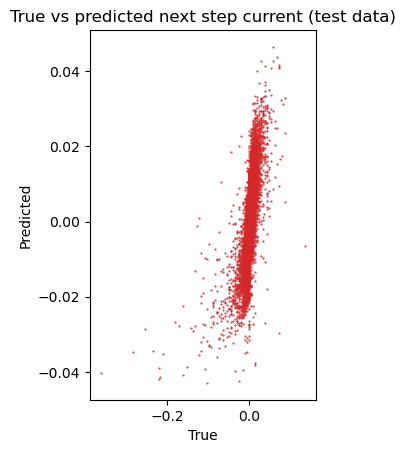

In [11]:
ridgecv_pred = clf.predict(X_test)

plt.subplot(1, 2, 2)

plt.plot(y_test[:,0],ridgecv_pred[:,0], '.', color = 'C3', markersize=1, alpha = 1, )
#plt.legend()
# plt.ylim(-1,1)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs predicted next step current (test data)')
# plt.savefig(f"{folder_path}/performance.png")

In [12]:
print("Information about x_train values:")
print("Minimum value:", np.min(X_train))
print("Maximum value:", np.max(X_train))
print("Mean value:", np.mean(X_train))
print("Standard deviation:", np.std(X_train))

Information about x_train values:
Minimum value: 0.04888
Maximum value: 160.0
Mean value: 49.78291411558146
Standard deviation: 45.8992887888475


In [13]:
print("Information about y_train values:")
print("Minimum value:", np.min(y_train))
print("Maximum value:", np.max(y_train))
print("Mean value:", np.mean(y_train))
print("Standard deviation:", np.std(y_train))

Information about y_train values:
Minimum value: -0.46399999999999997
Maximum value: 0.13169999999999993
Mean value: -3.0395116601247015e-05
Standard deviation: 0.018509432443683704


In [14]:
import keras

import tensorflow.keras.backend as K



def create_nn(dropout_rate=0.5):
    global X_train, points
    # Input layer, the number of input nodes is governed by X_data.shape[1]
    # X_data.shape[1] is the number of columns in X_data
    inputs = keras.Input(shape=(X_train.shape[1],), name='input')
    x = inputs
    # Dense layers 
    #layers_norm = keras.layers.BatchNormalization()(inputs)
    dropout_layer = False
    params_per_layer = 20
    number_of_layers = 3
    
    for i in range(number_of_layers):    
        x = keras.layers.Dense(params_per_layer, 'linear')(x)
        if dropout_layer:
            x = keras.layers.Dropout(rate=dropout_rate)(x)
    x = keras.layers.Dense(params_per_layer, 'sigmoid')(x)
    x = keras.layers.Dense(params_per_layer*3, 'exponential')(x)
    x = keras.layers.Dense(params_per_layer, 'linear')(x)
    # x = keras.layers.Dense(params_per_layer, 'exponential')(x)
    # Parameter layer
    # layers_norm = keras.layers.LayerNormalization()(layers_dense2)
    output = keras.layers.Dense(y_train.shape[1], activation = 'exponential')(x)
    # Expand parameters to have same shape as y_true
    # expanded_parameters = keras.layers.RepeatVector(points)(parameters)


    return keras.Model(inputs=inputs, outputs=output, name="current_function_prediction")

In [15]:
if load:
    model = keras.models.load_model(model_path)
else:
    model = create_nn(dropout_rate=0)

model.summary()


Model: "current_function_prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 20)                80        
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 60)                1260      
                                                                 
 dense_5 (Dense)             (None, 20

In [16]:
def compile_model(model):
    sgd = keras.optimizers.RMSprop(clipnorm=5)
    model.compile(optimizer='adam', #'sgd'
                  loss= 'mse', #'mean_absolute_error'  #'mse'
                  metrics=['R2Score']
                  )
    


number_of_epochs = 200




earlystopper = keras.callbacks.EarlyStopping(monitor="val_loss",baseline = 1, patience=number_of_epochs,restore_best_weights=False)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                              factor=0.5, 
                              patience=5, 
                              min_lr=1e-4)
compile_model(model)

import seaborn as sns
def plot_history(history, metrics, y_lim):
    """
    Plot the training history

    Args:
        history (keras History object that is returned by model.fit())
        metrics (str, list): Metric or a list of metrics to plot
    """
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    if y_lim != 0:
        plt.ylim(0,y_lim)
    plt.xlabel("epochs")
    plt.ylabel("metric")



In [17]:
history = model.fit(X_train, y_train,
                    batch_size=1024,
                    epochs=number_of_epochs,
                    validation_data = (X_val,y_val),
                    callbacks=[earlystopper
                               ,reduce_lr
                               ],
                    verbose=2)

Epoch 1/200


34/34 - 1s - loss: 0.0016 - r2_score: -3.7668e+00 - val_loss: 3.3810e-04 - val_r2_score: 0.0019 - lr: 0.0010 - 1s/epoch - 43ms/step
Epoch 2/200
34/34 - 0s - loss: 3.4135e-04 - r2_score: 0.0037 - val_loss: 3.3725e-04 - val_r2_score: 0.0044 - lr: 0.0010 - 82ms/epoch - 2ms/step
Epoch 3/200
34/34 - 0s - loss: 3.4072e-04 - r2_score: 0.0055 - val_loss: 3.3683e-04 - val_r2_score: 0.0056 - lr: 0.0010 - 89ms/epoch - 3ms/step
Epoch 4/200
34/34 - 0s - loss: 3.4047e-04 - r2_score: 0.0062 - val_loss: 3.3668e-04 - val_r2_score: 0.0061 - lr: 0.0010 - 80ms/epoch - 2ms/step
Epoch 5/200
34/34 - 0s - loss: 3.4037e-04 - r2_score: 0.0065 - val_loss: 3.3660e-04 - val_r2_score: 0.0063 - lr: 0.0010 - 79ms/epoch - 2ms/step
Epoch 6/200
34/34 - 0s - loss: 3.4029e-04 - r2_score: 0.0067 - val_loss: 3.3653e-04 - val_r2_score: 0.0065 - lr: 0.0010 - 80ms/epoch - 2ms/step
Epoch 7/200
34/34 - 0s - loss: 3.4022e-04 - r2_score: 0.0069 - val_loss: 3.3646e-04 - val_r2_score: 0.0067 - lr: 0.0010 - 102ms/epoch 

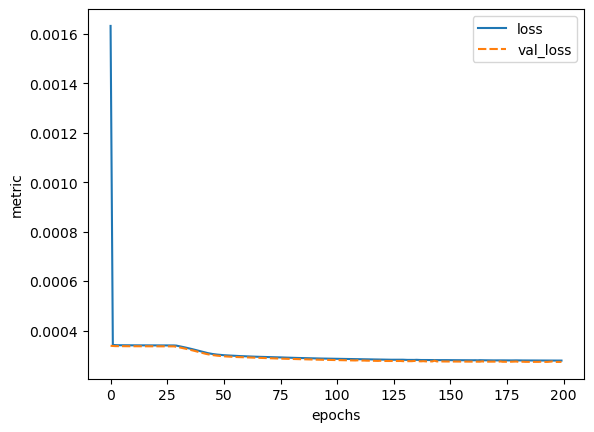

In [18]:
# call the plot_history function with the apropriate object and string
plot_history(history, ['loss', 'val_loss'], 0)

In [19]:
# # Save the model
# import os
# from datetime import datetime
# current_date = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
# # filename = f"{current_date}_RMSE_params_{model.count_params()}_points_{points}.keras"
# # model.save('models/'+filename)


# folder_path = f'models/{current_date}_single_step_v5'
# os.makedirs(folder_path, exist_ok=True)
# model.save(folder_path+'/model.keras')
# model.save(folder_path+'/model.h5')

In [20]:
# make prediction on test data
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

233/233 [==============================] - 0s 772us/step


In [21]:
model.evaluate(X_test, y_test,verbose=1)

233/233 [==============================] - 0s 840us/step - loss: 2.8543e-04 - r2_score: 0.1824


[0.0002854319754987955, 0.18244796991348267]

In [22]:
y_train.shape

(34648, 1)

Text(0.5, 1.0, 'True vs predicted next step current (test data)')

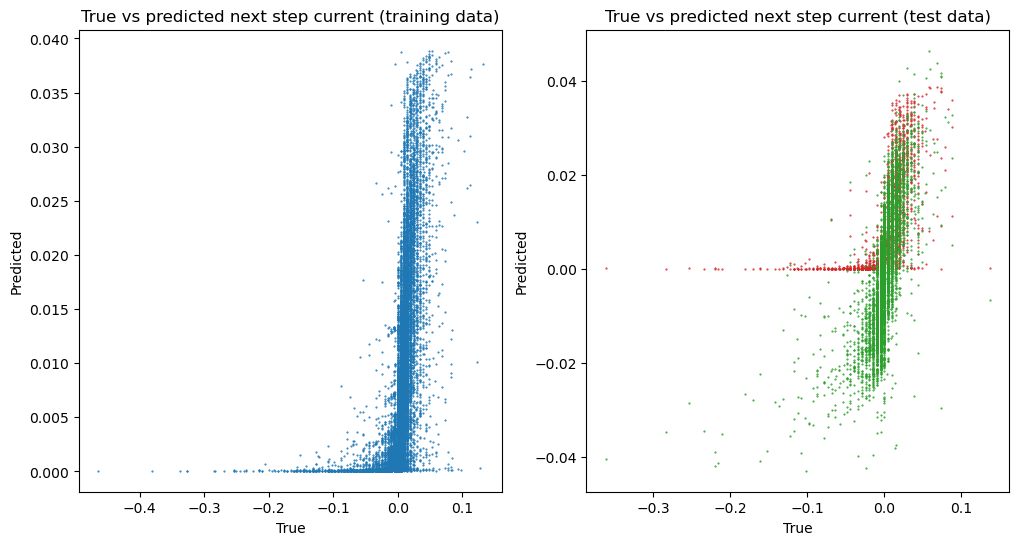

In [23]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(y_train, y_train_prediction, '.', color = 'C0',markersize=1,  alpha = 1, )
# plt.legend()
    # plt.ylim(-1,1)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs predicted next step current (training data)')





plt.subplot(1, 2, 2)

plt.plot(y_test,y_test_prediction, '.', color = 'C3', markersize=1, alpha = 1, )
plt.plot(y_test,ridgecv_pred, '.', color = 'C2', markersize=1, alpha = 1, )  
#plt.legend()
# plt.ylim(-1,1)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs predicted next step current (test data)')
# plt.savefig(f"{folder_path}/performance.png")

C:\Users\crpdn\AppData\Local\Temp\ipykernel_8688\3166570839.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(y_train, 1-np.abs(y_train_prediction-y_train)/y_train, '.', color = 'C0', markersize=1, alpha = 1, )
C:\Users\crpdn\AppData\Local\Temp\ipykernel_8688\3166570839.py:18: RuntimeWarning: divide by zero encountered in divide
  plt.plot(y_test,1-np.abs(y_test_prediction-y_test)/y_test, '.', color = 'C3', markersize=1, alpha = 1, )


Text(0.5, 1.0, 'Accuracy of next step current prediction (test data)')

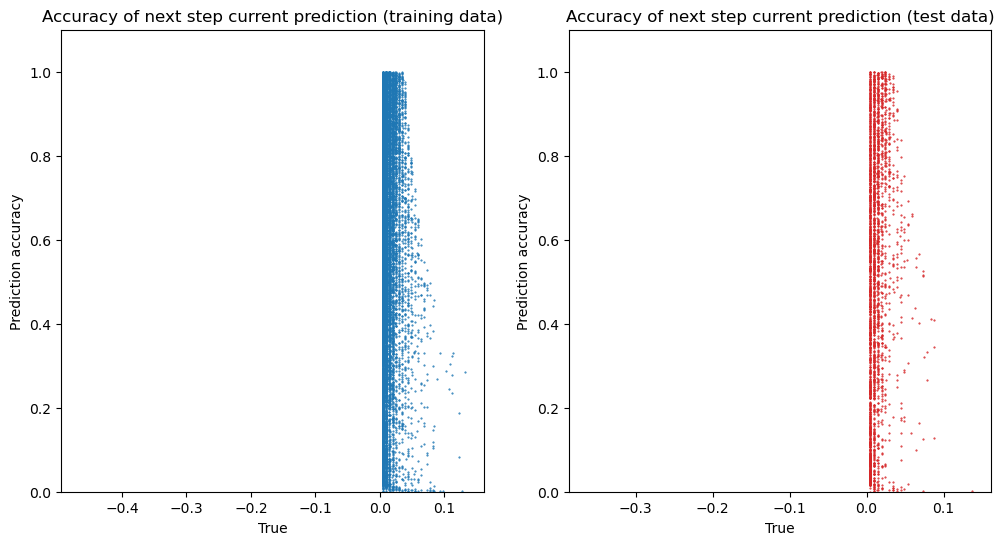

In [24]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(y_train, 1-np.abs(y_train_prediction-y_train)/y_train, '.', color = 'C0', markersize=1, alpha = 1, )
# plt.legend()
plt.ylim(0,1.1)
plt.xlabel('True')
plt.ylabel('Prediction accuracy')
plt.title('Accuracy of next step current prediction (training data)')





plt.subplot(1, 2, 2)

plt.plot(y_test,1-np.abs(y_test_prediction-y_test)/y_test, '.', color = 'C3', markersize=1, alpha = 1, )
    
#plt.legend()
plt.ylim(0,1.1)
plt.xlabel('True')
plt.ylabel('Prediction accuracy')
plt.title('Accuracy of next step current prediction (test data)')
# plt.savefig(f"{folder_path}/performance.png")